In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['six_1m_20020101_20021231_ptrc_T.nc']


(12, 800, 544)
0


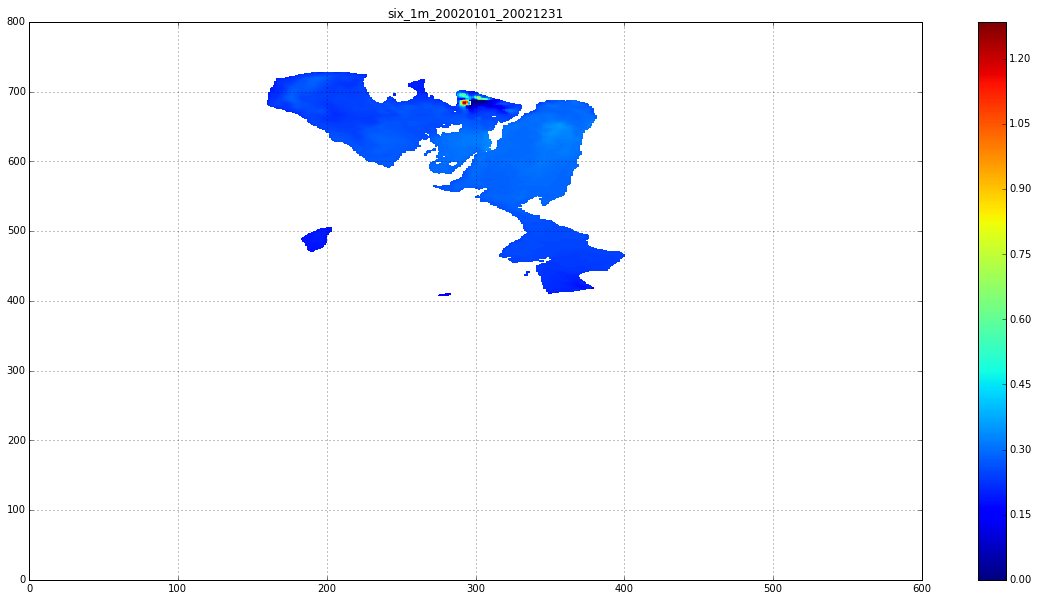

In [60]:
fig = plt.figure(figsize=(20,10))
for k in range (len(nc_filename)):
    ptrc=nc.Dataset(nc_filename[k])
    #print 'filename:%s'%nc_filename[0]
    #nav_lon=ptrc.variables['nav_lon'][:]#[::10,::10]
    #nav_lat=ptrc.variables['nav_lat'][:]#[::10,::10]
    TR_7=ptrc.variables['TR_7'][:,40,:,:]#[:,:,::10,:10]
    #TR_9=ptrc.variables['TR_9'][:]
    #TR_8=ptrc.variables['TR_8'][:]
    TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
    #TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
    #TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
    TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
    #TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
    #TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
    print TR_7.shape
    #print TR_7[1,2,:,:].max()
    #print TR_7[1,2,:,:].min()

    ii=[]
    jj=[]
    timestep=-1
    for i in range (len(TR_7[0,:,0])):
        for j in range (len(TR_7[0,0,:])):
            if TR_7[timestep,i,j]>5:
                ii.append(i)
                jj.append(j)
                #if len(jj)>0:
                    #print jj,ii

    ax = fig.add_subplot(1,len(nc_filename),k+1)
    plt.pcolor(TR_7[timestep,:,:])
    plt.colorbar()
    #plt.clim([1e20,1e30])
    print len(jj)
    plt.scatter(jj,ii,color='grey',s=100)
    plt.title('%s'%nc_filename[k][0:-10])
    plt.grid(True)
plt.show()

In [2]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry']

In [3]:
import matplotlib.cm as cm
def vetical(data,dep,string):
    a=np.where(data==data.max())
    print a
    for i in range (len(data[:,1,1,1])):
        cc=cm.Spectral(i*25)
        plt.plot(data[-i,:,a[2][0],a[3][0]],dep,color=cc,linewidth=1,label='T:%s'%i)
        plt.legend()

    for k in range (len(dep)):
        plt.axhline(dep[k],c="grey",linestyle='--',linewidth=0.5,alpha=0.5)
    plt.axhline(bathy[a[2][0],a[3][0]],c="grey",linewidth=5,alpha=0.7)
    plt.ylabel('depth (m)')
    plt.xlabel('%s Conc.'%string)
    plt.gca().invert_yaxis()
    print ('deepest:%s m'%bathy[a[2][0],a[3][0]])

found *.nc file: 
['six_1m_20020101_20021231_ptrc_T.nc']
(array([11]), array([42]), array([688]), array([303]))
deepest:2723.09 m
(array([11]), array([42]), array([688]), array([303]))
deepest:2723.09 m
(array([11]), array([42]), array([687]), array([304]))
deepest:2741.68 m
(array([11]), array([42]), array([688]), array([303]))
deepest:2723.09 m


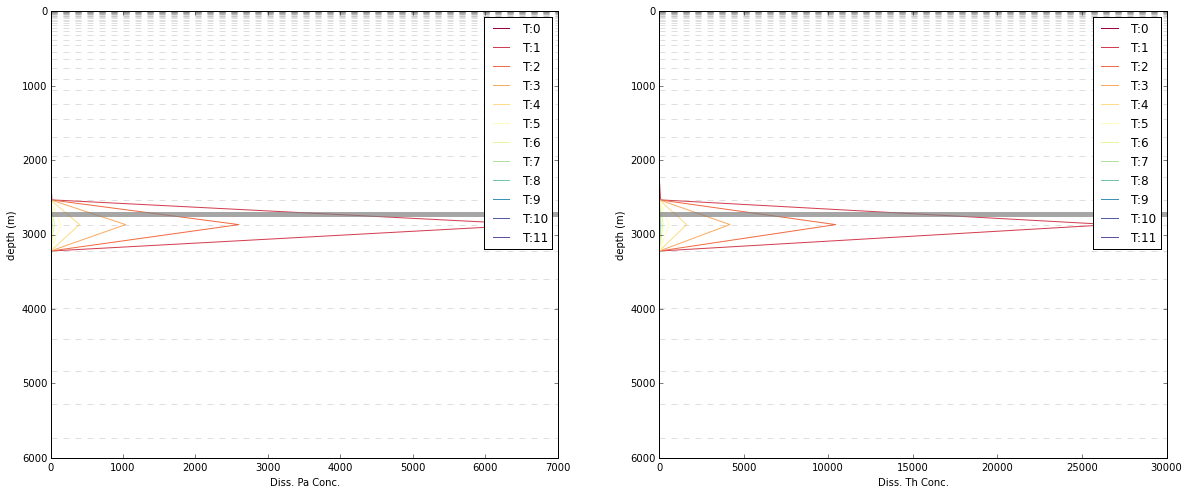

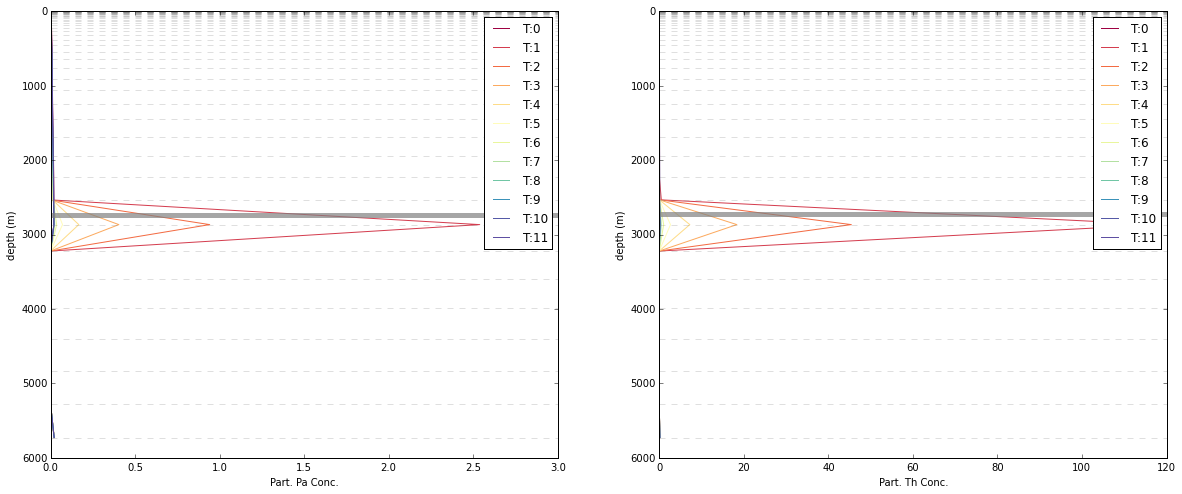

In [5]:
#nc_filename=sorted(glob.glob('1yr/Off_*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

ptrc=nc.Dataset(nc_filename[0])
TR_7=ptrc.variables['TR_7'][:,:,:,:]
TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:]
TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_7,dep,'Diss. Pa')
plt.subplot(122)
vetical(TR_8,dep,'Diss. Th')

fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_9,dep,'Part. Pa')
plt.subplot(122)
vetical(TR_10,dep,'Part. Th')

plt.show()

The grey line is the actual depth in this point.

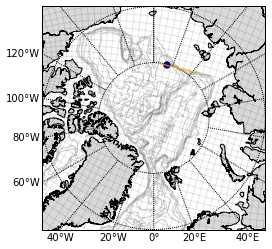

In [25]:
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[1, 0, 0, 1])

X, Y = m(nav_lon, nav_lat)
cs=m.contour(X,Y,bathy,colors='k',alpha=0.2)
m.plot(X[::10,::10], Y[::10,::10],X[::10,::10].T, Y[::10,::10].T,color='k',alpha=0.1)
m.plot(X[688,290:350],Y[688,290:350],color='orange')
m.scatter(X[688,303],Y[688,303],s=40)

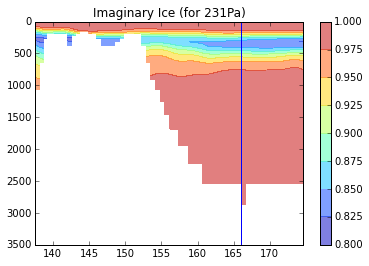

In [29]:
nav_lat=ptrc.variables['nav_lat'][:,:]
nav_lon=ptrc.variables['nav_lon'][:,:]
TR_11=ptrc.variables['TR_11'][:,:,:,:]
TR_11=np.ma.masked_where(TR_11<= 0, TR_11)
plt.contourf(nav_lon[688,290:350],dep,TR_11[11,:,688,290:350],alpha=0.5)
plt.colorbar()
plt.axvline(x=nav_lon[688,303])
plt.title('Imaginary Ice (for 231Pa)')
plt.ylim([0,3500])
plt.gca().invert_yaxis()

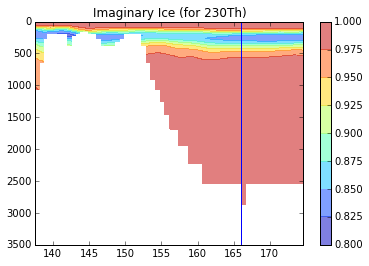

In [30]:
TR_12=ptrc.variables['TR_12'][:,:,:,:]
TR_12=np.ma.masked_where(TR_12<= 0, TR_12)
plt.contourf(nav_lon[688,290:350],dep,TR_12[11,:,688,290:350],alpha=0.5)
plt.colorbar()
plt.axvline(x=nav_lon[688,303])
plt.title('Imaginary Ice (for 230Th)')
plt.ylim([0,3500])
plt.gca().invert_yaxis()

In [49]:
def plot_inf(filenum,num,string):
    ptrc=nc.Dataset(nc_filename[filenum])
    print 'filename:%s'%nc_filename[filenum]
    if string =='time':
        if num==7:
            TR_7=ptrc.variables['TR_7'][:,40,:,:]
            TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
            trc=np.ma.masked_where(np.isnan(TR_7),TR_7)
        if num==8:
            TR_8=ptrc.variables['TR_8'][:,40,:,:]
            TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
            trc=np.ma.masked_where(np.isnan(TR_8),TR_8)
    else:
        if num==7:
            TR_7=ptrc.variables['TR_7'][-1,::5,:,:]
            TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
            trc=np.ma.masked_where(np.isnan(TR_7),TR_7)
        if num==8:
            TR_8=ptrc.variables['TR_8'][-1,::5,:,:]
            TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
            trc=np.ma.masked_where(np.isnan(TR_8),TR_8)

    data=trc
    fig = plt.figure(figsize=(20,15))
    for k in range (len(data[:,0,0])):
        ii=[]
        jj=[]
        for i in range (len(data[0,:,0])):
            for j in range (len(data[0,0,:])):
                if data[k,i,j]>5:
                    ii.append(i)
                    jj.append(j)

        ax = fig.add_subplot(3,4,k+1)
        #if k==0:
        plt.pcolor(data[k,:,:])
        #else:
        #    plt.pcolor(data[k,:,:]-data[k-1,:,:])
        plt.colorbar()
        plt.scatter(jj,ii,alpha=0.3,color='grey',s=50)
        if string =='time':
            plt.title('t=%sm, # of unusual points=%s'%(k+0.5,len(jj)))
            #plt.ylim([450,800])
        else:
            plt.title('timestep=-1,layer=%s,# of unusual points=%s'%(k*5,len(jj)))
        #plt.clim([0.0,0.2])        
    plt.show()

filename:six_1m_20020101_20021231_ptrc_T.nc


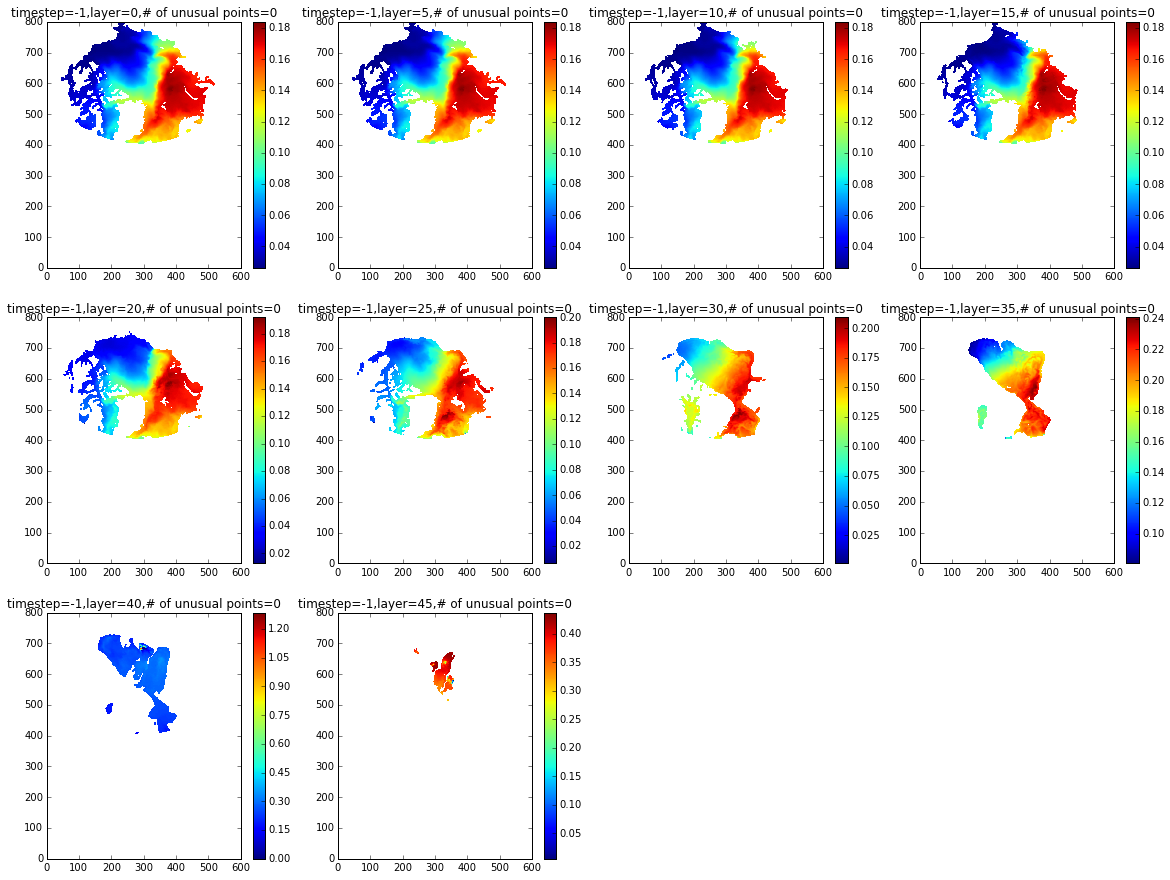

In [50]:
plot_inf(0,7,'dep')

filename:six_1m_20020101_20021231_ptrc_T.nc


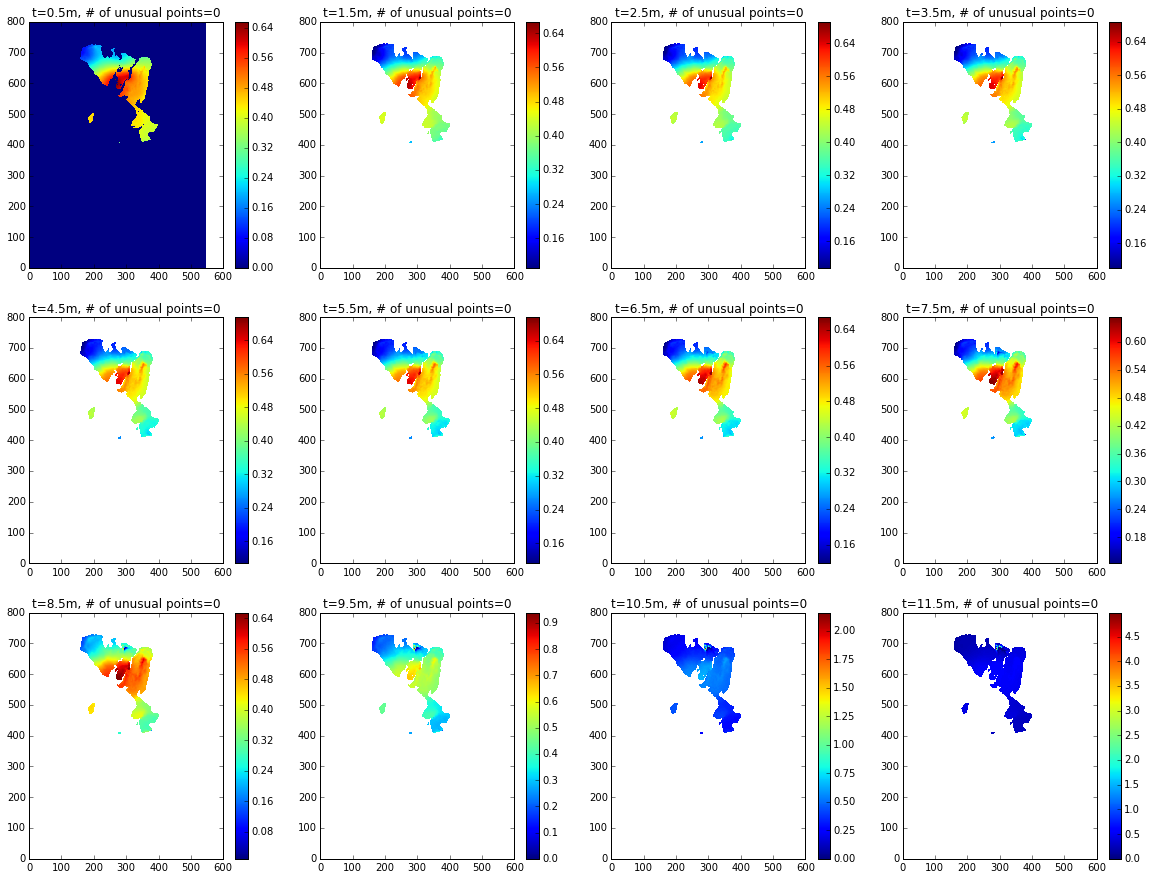

In [51]:
plot_inf(0,8,'time')